In [1]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [6]:
# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

# Загружаем данные в pandas
data = pd.read_csv(f'{path}/heart.csv')

# Быстрый обзор датасета
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
# Проверим на наличие пропусков
data.isnull().sum()

# Преобразуем категориальные признаки в числовые, если они есть
# Например, для 'sex' и 'target' заменим значения на числовые
data['sex'] = data['sex'].map({0: 'female', 1: 'male'})
data['target'] = data['target'].map({0: 'no_disease', 1: 'disease'})

# Разделим данные на признаки и целевую переменную
X = data.drop(columns=['target'])
y = data['target']

# Преобразуем категориальные признаки с помощью get_dummies (если есть категориальные признаки)
X = pd.get_dummies(X)

# Разделим данные на обучающую и тестовую выборку
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабируем данные
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
# Логистическая регрессия
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Предсказания и оценка
y_pred_logreg = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", logreg_accuracy)
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8051948051948052
              precision    recall  f1-score   support

     disease       0.76      0.87      0.81       149
  no_disease       0.86      0.75      0.80       159

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.80       308
weighted avg       0.81      0.81      0.80       308



In [9]:
# Машинный опорный вектор (SVM)
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Предсказания и оценка
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8896103896103896
              precision    recall  f1-score   support

     disease       0.86      0.92      0.89       149
  no_disease       0.92      0.86      0.89       159

    accuracy                           0.89       308
   macro avg       0.89      0.89      0.89       308
weighted avg       0.89      0.89      0.89       308



In [10]:
# Дерево решений
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Предсказания и оценка
y_pred_tree = tree.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", tree_accuracy)
print(classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.9707792207792207
              precision    recall  f1-score   support

     disease       1.00      0.94      0.97       149
  no_disease       0.95      1.00      0.97       159

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



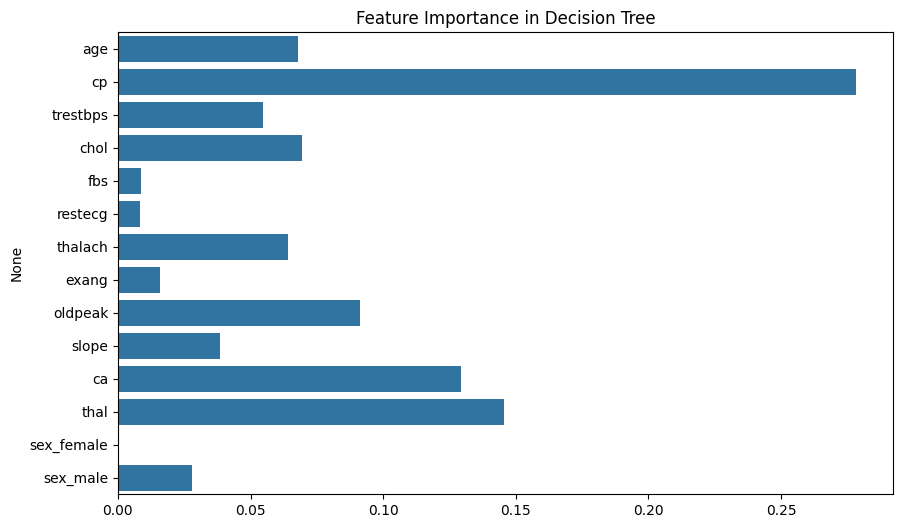

In [11]:
# Важность признаков в дереве решений
plt.figure(figsize=(10,6))
sns.barplot(x=tree.feature_importances_, y=X.columns)
plt.title("Feature Importance in Decision Tree")
plt.show()


In [12]:
# Визуализация дерева решений
plt.figure(figsize=(12, 8))
tree_rules = export_text(tree, feature_names=list(X.columns))
print(tree_rules)


|--- cp <= -0.45
|   |--- ca <= -0.26
|   |   |--- thal <= 0.28
|   |   |   |--- thalach <= -1.35
|   |   |   |   |--- class: no_disease
|   |   |   |--- thalach >  -1.35
|   |   |   |   |--- exang <= 0.35
|   |   |   |   |   |--- chol <= 1.49
|   |   |   |   |   |   |--- class: disease
|   |   |   |   |   |--- chol >  1.49
|   |   |   |   |   |   |--- chol <= 2.44
|   |   |   |   |   |   |   |--- class: no_disease
|   |   |   |   |   |   |--- chol >  2.44
|   |   |   |   |   |   |   |--- class: disease
|   |   |   |   |--- exang >  0.35
|   |   |   |   |   |--- thalach <= -0.18
|   |   |   |   |   |   |--- trestbps <= -0.96
|   |   |   |   |   |   |   |--- class: disease
|   |   |   |   |   |   |--- trestbps >  -0.96
|   |   |   |   |   |   |   |--- class: no_disease
|   |   |   |   |   |--- thalach >  -0.18
|   |   |   |   |   |   |--- fbs <= 0.95
|   |   |   |   |   |   |   |--- trestbps <= 0.75
|   |   |   |   |   |   |   |   |--- class: disease
|   |   |   |   |   |   |   |--- tre

<Figure size 1200x800 with 0 Axes>